In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn import preprocessing
import scipy

In [2]:
path = 'ASTROSFINAL.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,date,sum_crimes,weekday,month,mode_hr,game,seasons
0,2010-01-01,18,Friday,Jan,0,No Game,No game
1,2010-01-02,13,Saturday,Jan,14,No Game,No game
2,2010-01-03,12,Sunday,Jan,0,No Game,No game
3,2010-01-04,9,Monday,Jan,14,No Game,No game
4,2010-01-05,8,Tuesday,Jan,2,No Game,No game


In [5]:
df.drop(['date','weekday','month'], axis=1, inplace=True)

In [6]:
no_game = df.game == 'No Game'

game = df[~no_game]

In [7]:
game.head()

,sum_crimes,mode_hr,game,seasons
94,17,19,Lost Game,Regular
95,9,0,Lost Game,Regular
96,8,12,Lost Game,Regular
98,12,17,Lost Game,Regular
99,14,0,Lost Game,Regular


# Dummy

In [8]:
dft = pd.get_dummies(game, drop_first=True)

In [10]:
dft.head()

,sum_crimes,mode_hr,game_Won Game,seasons_Regular
94,17,19,0,1
95,9,0,0,1
96,8,12,0,1
98,12,17,0,1
99,14,0,0,1


## Split game, no game

In [ ]:
no_game = dft.game == 'N'

game = dft[~no_game]
nogame = dft[no_game]

In [ ]:
game = pd.get_dummies(game)

In [11]:
game = dft.copy()

In [12]:
game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 658 entries, 94 to 2853
Data columns (total 4 columns):
sum_crimes         658 non-null int64
mode_hr            658 non-null int64
game_Won Game      658 non-null uint8
seasons_Regular    658 non-null uint8
dtypes: int64(2), uint8(2)
memory usage: 16.7 KB


## TEST

In [13]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [14]:

# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('sum_crimes ~ mode_hr',game).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:             sum_crimes   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     19.71
Date:                Fri, 13 Jul 2018   Prob (F-statistic):           1.06e-05
Time:                        22:55:32   Log-Likelihood:                -1845.9
No. Observations:                 658   AIC:                             3696.
Df Residuals:                     656   BIC:                             3705.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.8676      0.271     29.023      0.0

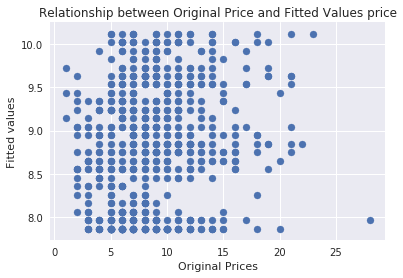

In [15]:

# your turn# your t 
plt.scatter(game.sum_crimes,m.fittedvalues)
plt.xlabel("Original Prices")
plt.ylabel("Fitted values")

plt.title("Relationship between Original Price and Fitted Values price")
plt.show()

## sklearn

In [16]:
X = game.drop('sum_crimes', axis=1)
y = game['sum_crimes']

In [17]:
from sklearn.linear_model import LinearRegression
# This creates a LinearRegression object
lm = LinearRegression()


lm.fit(X,y)
prediction = lm.predict(X)

In [18]:

# The coefficients# The co 
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,mode_hr,0.097908
1,game_Won Game,-0.223290
2,seasons_Regular,-1.220993


/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


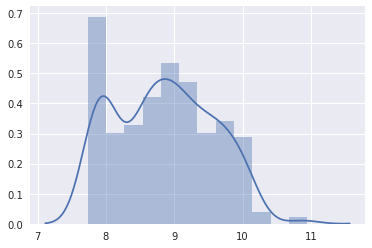

In [19]:
sns.distplot(lm.predict(X))

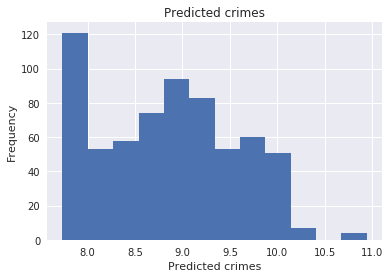

In [20]:

# your turn
plt.hist(lm.predict(X), bins='auto')
plt.title("Predicted crimes")
plt.xlabel("Predicted crimes")
plt.ylabel("Frequency")
plt.show()

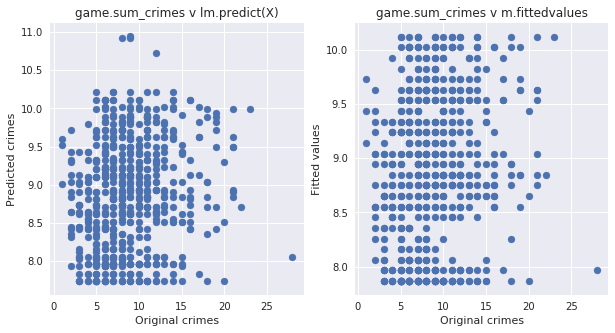

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 5), sharey=False)
ax0, ax1 = axes.flatten()

ax0.scatter(y, lm.predict(X))
ax0.set_xlabel("Original crimes")
ax0.set_ylabel("Predicted crimes")
ax0.set_title('game.sum_crimes v lm.predict(X)')
ax1.set_title('game.sum_crimes v m.fittedvalues')
ax1.scatter(y,m.fittedvalues)
ax1.set_xlabel("Original crimes")
ax1.set_ylabel("Fitted values")
plt.show()

In [22]:

# ESS/TSS/R_sq# ESS/TS 
RSS = np.sum((y - prediction) ** 2)
ESS = np.sum(prediction - np.mean(y)) ** 2
R_sq = lm.score(X, y)

print('Residual Sum-of-Squares RSS       : {}'.format(RSS))
print('Explained Sum-of-Squares ESS      : {}'.format(ESS))
print('Coefficient of Determination R-sq : {}'.format(R_sq))

Residual Sum-of-Squares RSS       : 10509.879443023423
Explained Sum-of-Squares ESS      : 3.783455787530495e-26
Coefficient of Determination R-sq : 0.031115721729483514


In [23]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.05040930001197297
Root Mean Squared Error: 3.786674896030896


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)

reg_all = LinearRegression()

reg_all.fit(X_train, y_train)

y_pred = reg_all.predict(X_test)

reg_all.score(X_test,y_test)  # R square,
# NEVER  use out of the box!

0.05040930001197297

In [25]:
from sklearn.model_selection import cross_val_score

reg = LinearRegression()

# regressor, feature data, target data, number of folds
#returns an array of cross-validaiton scores, 
cv_results = cross_val_score(reg,X,y,cv=5)
# the length of the array is the number of folts utilized
print(cv_results)  # R square, default score of linear regression

[-0.07829209 -0.00328101  0.00819789 -0.00998306  0.02205996]


In [26]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X,y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[-0.07829209 -0.00328101  0.00819789 -0.00998306  0.02205996]
Average 5-Fold CV Score: -0.012259663201798257


In [27]:

# Import necessary modules# Import 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg,X,y,cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg,X,y,cv=10)
print(np.mean(cvscores_10))

0.015986789647200534
-0.059813372746352525


In [28]:
from sklearn.linear_model import Ridge

X_train,x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

ridge = Ridge(alpha=0.1, normalize=True)  # normalized=true all our variables are on teh same scale 

ridge.fit(X_train,y_train)

ridge_pred = ridge.predict(X_test)

ridge.score(X_test, y_test)

0.04743592109265948

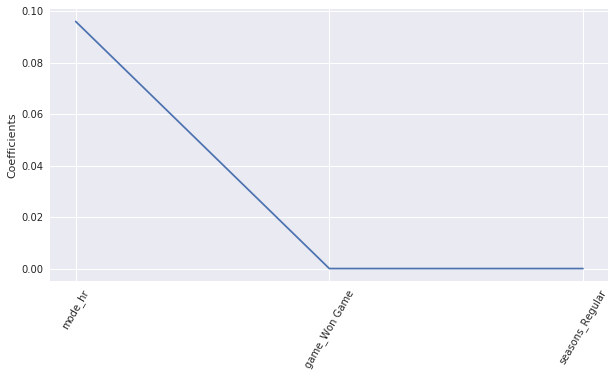

In [29]:
from sklearn.linear_model import Lasso
X = game.drop('sum_crimes', axis=1).values
y = game['sum_crimes'].values
names = game.drop('sum_crimes', axis=1).columns

lasso = Lasso(alpha=0.1)

lasso_coef = lasso.fit(X,y).coef_  # extract the coef attribute


# plot the coefficientrs as a function of feature names 
fig,ax = plt.subplots(figsize=(10,5))
_ = plt.plot(range(len(names)), lasso_coef)

_ = plt.xticks(range(len(names)), names, rotation=60)

_ = plt.ylabel('Coefficients')


plt.show()

In [ ]:
df_columns = game.drop('sum_crimes', axis=1).columns

# Import Lasso# Import 
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns, rotation=60)
plt.margins(0.02)
plt.show()

In [ ]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()


In [ ]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge,X,y,cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

In [ ]:
dft.game.unique()
nogame = dft.game == 'No Game'

In [ ]:
dft = dft[~nogame]

In [ ]:
X_rooms = dft.mode_hr.values
X_rooms = X_rooms.reshape(-1,1)
X_rooms.shape

In [ ]:
y = dft['sum_crimes'].values
y = y.reshape(-1,1)
y.shape

In [ ]:

plt.scatter(X_rooms, y)
plt.ylabel('Value of House /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

In [ ]:
# import libraries
import numpy as np
from sklearn import linear_model


# instatiate LinearRegression as regr
reg = linear_model.LinearRegression()

# fit the regression to the data using `.fit()`
reg.fit(X_rooms, y)

#  check out the regdression predictions over the range of the data
# using np.linspace  betw max & min  num of rooms
prediction_space = np.linspace(min(X_rooms),
                               max(X_rooms)).reshape(-1,1)
# plot

print(reg.score(X_rooms, y))

plt.scatter(X_rooms, y, color='blue')

plt.plot(prediction_space, reg.predict(prediction_space),
        color='black',
        linewidth=3)
plt.ylabel('Value of House /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

In [32]:
game.head()

,sum_crimes,mode_hr,game_Won Game,seasons_Regular
94,17,19,0,1
95,9,0,0,1
96,8,12,0,1
98,12,17,0,1
99,14,0,0,1


/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


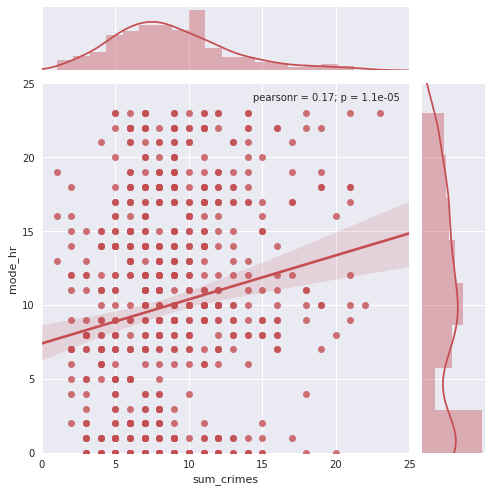

In [37]:
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("sum_crimes", "mode_hr", data=game, kind="reg", xlim=(0, 25), ylim=(0, 25),
                  color="r", size=7)

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


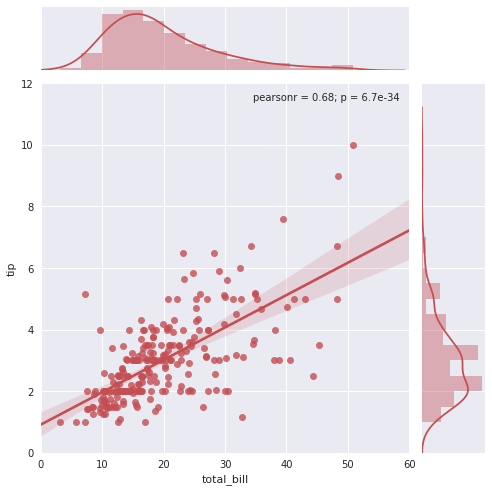

In [38]:
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)


g = sns.jointplot("total_bill", "tip", data=tips, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color="r", size=7)

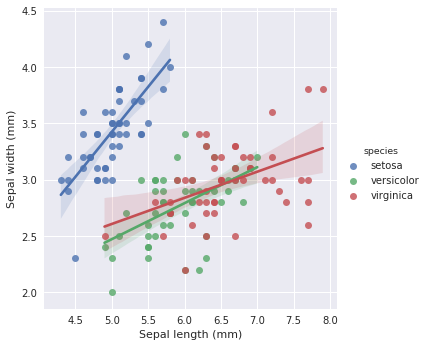

In [40]:
import seaborn as sns
sns.set()

# Load the example tips dataset
iris = sns.load_dataset("iris")

# Plot tip as a function of toal bill across days
g = sns.lmplot(x="sepal_length", y="sepal_width", hue="species",
               truncate=True, size=5, data=iris)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Sepal length (mm)", "Sepal width (mm)")

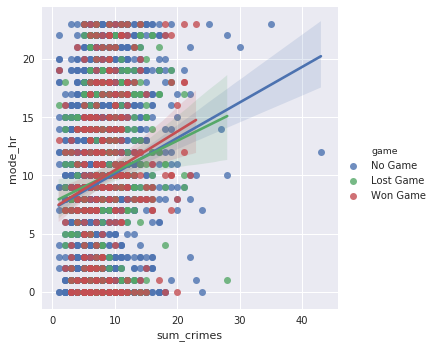

In [49]:
# Plot tip as a function of toal bill across days
g = sns.lmplot(x="sum_crimes", y="mode_hr",hue='game',
               truncate=True, size=5, data=df)



In [52]:
gg = df[~no_game]

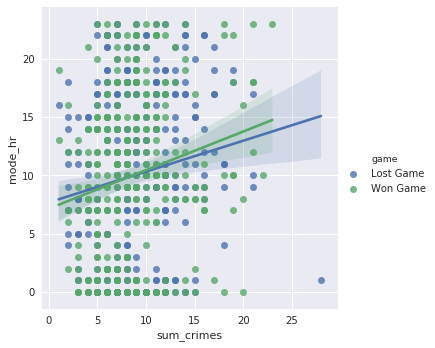

In [53]:
# Plot tip as a function of toal bill across days
g = sns.lmplot(x="sum_crimes", y="mode_hr",hue='game',
               truncate=True, size=5, data=gg)

